## Polynomial regression

Polynomial regression formula:

\begin{equation}
f(x) = \beta_{0} + \beta_{1}x_1 + \beta_{2}x_1^2 + \beta_{3}x_1^3 + \beta_{4}x_1^4
\end{equation}


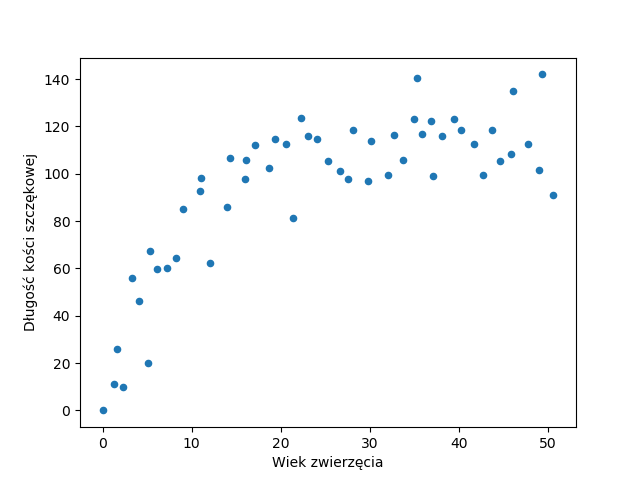

Example:  
transform_to_polynomial_feature(x, 5) -> $[x^1, x^2, x^3, x^4, x^5]$  
transform_to_polynomial_feature(x, 3) -> $[x^1, x^2, x^3]$

In [1]:
import numpy as np

In [2]:
def transform_to_polynomial_feature(x, n):
    out = []
    for i in range(1, n+1):
        out.append(x**i)
    return out

print(transform_to_polynomial_feature(2, 5))

[2, 4, 8, 16, 32]


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

jaws_dataset = pd.read_csv('datasets/jaws.csv', sep=',')

x = np.array(jaws_dataset['age'].values.reshape(-1, 1))
y = np.array(jaws_dataset['bone'].values)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [4]:
def calc_ssr(y_pred, y):
    ssr_sum = 0.0
    for yn_pred, yn in zip(y_pred, y):
        ssr_sum += (yn_pred - yn)**2
    ssr = ssr_sum / (2 * y.size)
    return ssr

In [5]:
def update_weights(alpha, beta, der_beta):
    return beta - alpha * der_beta

In [6]:
def update_beta0(beta0, y, pred, alpha):
    beta_0_sum = 0.0
    for yn, yn_pred in zip(y, pred):
        beta_0_sum += (yn_pred - yn)
    der_b0 = (1/y.size) * beta_0_sum
    return update_weights(alpha, beta0, der_b0)

In [7]:
def update_betas(betas, y, pred, alpha, X, degree):
    beta_n_sum = 0.0
    X = X.transpose(1, 0)
    for _ in range(degree):
        for yn, yn_pred, xn in zip(y, pred, X[_]):
            beta_n_sum += (yn_pred - yn) * xn
        der_beta = ( 1 / y.size) * beta_n_sum
        betas[_] = update_weights(alpha, betas[_], der_beta)
        beta_n_sum = 0
    return betas

In [8]:
def learn_and_fit_poly(X, y, degree = 1):
    m = X.shape[0]

    b0 = []
    betas = []
    error = []
    
    alpha = 0.01
    beta0 = np.random.rand()
    betasn = np.random.rand(degree)

    func = lambda x: beta0 + sum(betasn * x)
    
    epochs = 500
    
    X_poly = np.array([transform_to_polynomial_feature(xi[0], degree) for xi in X])

    for i in range(epochs):
        pred = list(map(func, X_poly))
        ssr = calc_ssr(pred, y)

        error.append(ssr)
        b0.append(beta0)
        betas.append(betasn.copy())

        beta0 = update_beta0(beta0, y, pred, alpha)
        betasn = update_betas(betasn, y, pred, alpha, X_poly, degree)
    
    return b0, betas, error

In [9]:
b0, bn, error = learn_and_fit_poly(X_scaled, y, 4)

f = lambda x: b0[-1] + sum(bn[-1] * x)

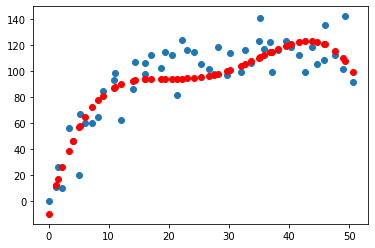

In [10]:
import matplotlib.pyplot as plt

plt.scatter(x, y)

xs_polynomial = [transform_to_polynomial_feature(xi[0], 4) for xi in X_scaled]
ys = [f(xi) for xi in xs_polynomial]

plt.scatter(x, ys, color='red')

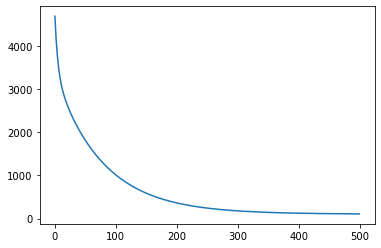

In [11]:
plt.plot(error)

In [12]:
print(error[499])

109.62776193702938


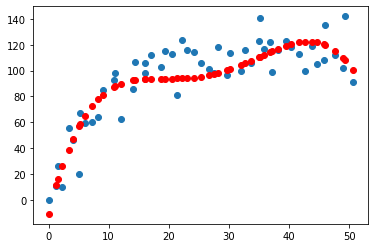

In [13]:
b0, bn, error = learn_and_fit_poly(X_scaled, y, 5)

f = lambda x: b0[-1] + sum(bn[-1] * x)

plt.scatter(x, y)

xs_polynomial = [transform_to_polynomial_feature(xi[0], 5) for xi in X_scaled]
ys = [f(xi) for xi in xs_polynomial]
plt.scatter(x, ys, color='red')

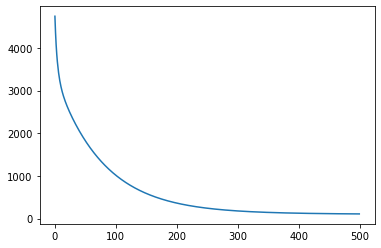

In [14]:
plt.plot(error)

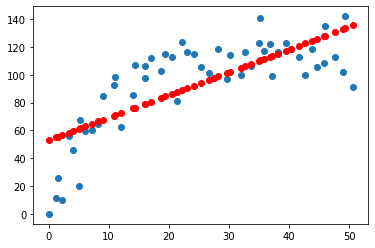

In [15]:
b0, bn, error = learn_and_fit_poly(X_scaled, y)

f = lambda x: b0[-1] + sum(bn[-1] * x)

plt.scatter(x, y)

xs_polynomial = [transform_to_polynomial_feature(xi[0], 1) for xi in X_scaled]
ys = [f(xi) for xi in xs_polynomial]
plt.scatter(x, ys, color='red')

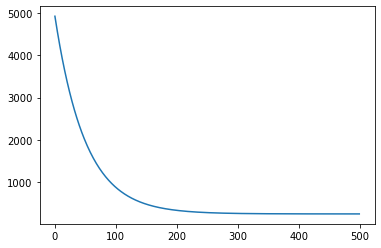

In [16]:
plt.plot(error)

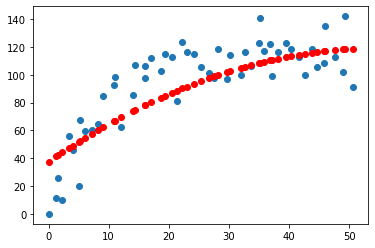

In [17]:
b0, bn, error = learn_and_fit_poly(X_scaled, y, 2)

f = lambda x: b0[-1] + sum(bn[-1] * x)

plt.scatter(x, y)

xs_polynomial = [transform_to_polynomial_feature(xi[0], 2) for xi in X_scaled]
ys = [f(xi) for xi in xs_polynomial]
plt.scatter(x, ys, color='red')

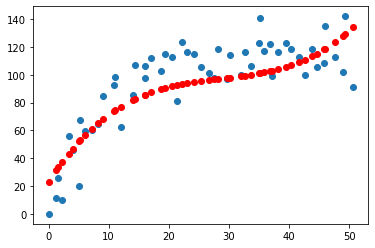

In [18]:
b0, bn, error = learn_and_fit_poly(X_scaled, y, 3)

f = lambda x: b0[-1] + sum(bn[-1] * x)

plt.scatter(x, y)

xs_polynomial = [transform_to_polynomial_feature(xi[0], 3) for xi in X_scaled]
ys = [f(xi) for xi in xs_polynomial]
plt.scatter(x, ys, color='red')